In [48]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE" 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [49]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 256)  
        self.layer2 = nn.Linear(256, 256)    
        self.layer3 = nn.Linear(256, 256)   
        self.layer4 = nn.Linear(256, 10)     

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)  
        return x

In [50]:
transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  
])
batch_size = 128
trainset =MNIST('data', train = True, download = True, transform = transform)
trainset.targets = torch.randint(0, 10, trainset.targets.shape)
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)

testset =MNIST('data', train = False, download = True, transform = transform)
testset.targets = torch.randint(0, 10, trainset.targets.shape)
test_loader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=True)

num_epoches = 100


In [51]:
def train(num_epochs,model,optimizer, train_loader, test_loader, criterion):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss_per_epoch = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss_per_epoch += loss.item()
        train_loss_per_epoch /= len(train_loader)
        train_losses.append(train_loss_per_epoch)
        print(f"Epoch {epoch}, train loss: {train_loss_per_epoch}")
        # test per epoch
        model.eval()
        test_loss_per_epoch = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_loader):
                data, target = data.to(device),target.to(device)
                output = model(data)
                loss = criterion(output, target)
                test_loss_per_epoch += loss.item()
        test_loss_per_epoch /= len(test_loader)
        test_losses.append(test_loss_per_epoch)
        print(f"Epoch {epoch}, test loss: {test_loss_per_epoch}")
        
    return train_losses, test_losses
        
        

In [52]:
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

train_losses, test_losses =train(num_epochs=num_epoches, model=model, train_loader=train_loader, test_loader=test_loader, criterion=criterion, optimizer=optimizer)



Epoch 0, train loss: 2.303640434228535
Epoch 0, test loss: 2.302805903591687
Epoch 1, train loss: 2.302861627993553
Epoch 1, test loss: 2.302911366088481
Epoch 2, train loss: 2.302712719069361
Epoch 2, test loss: 2.3026242225984985
Epoch 3, train loss: 2.3027195813559267
Epoch 3, test loss: 2.3048125188561936
Epoch 4, train loss: 2.3026442207507234
Epoch 4, test loss: 2.3028591433657875
Epoch 5, train loss: 2.302571000320825
Epoch 5, test loss: 2.3033438060857074
Epoch 6, train loss: 2.302450980713118
Epoch 6, test loss: 2.3028160046927537
Epoch 7, train loss: 2.302265546469292
Epoch 7, test loss: 2.3029274548156353
Epoch 8, train loss: 2.3022305914588066
Epoch 8, test loss: 2.3028219832649715
Epoch 9, train loss: 2.302066179735066
Epoch 9, test loss: 2.3030207217494145
Epoch 10, train loss: 2.3018731715074225
Epoch 10, test loss: 2.303170846987374
Epoch 11, train loss: 2.301371904324367
Epoch 11, test loss: 2.3037047567246836
Epoch 12, train loss: 2.301124421772418
Epoch 12, test loss

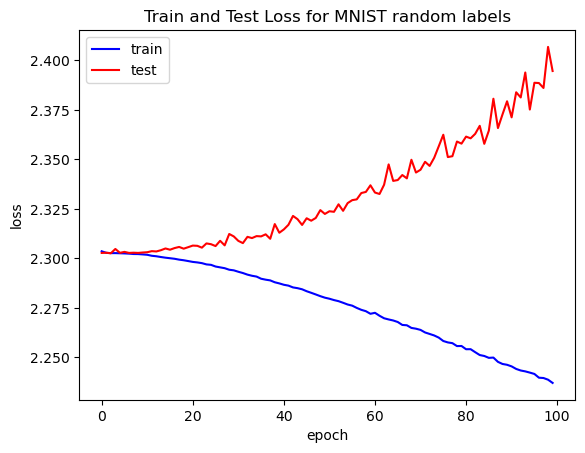

In [53]:
plt.figure()
plt.plot(train_losses, color='blue')
plt.plot(test_losses, color='red')
plt.legend(["train", "test"])
plt.title("Train and Test Loss for MNIST random labels")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [54]:
class Model_0(nn.Module):
    def __init__(self):
        super(Model_0, self).__init__()
        self.fc1 = nn.Linear(28*28,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,32)
        self.fc3 = nn.Linear(32,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_4(nn.Module):
    def __init__(self):
        super(Model_4, self).__init__()
        self.fc1 = nn.Linear(28*28,32)
        self.fc2 = nn.Linear(32,16)
        self.fc3 = nn.Linear(16,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_5(nn.Module):
    def __init__(self):
        super(Model_5, self).__init__()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,128)
        self.fc3 = nn.Linear(128,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_6(nn.Module):
    def __init__(self):
        super(Model_6, self).__init__()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,32)
        self.fc3 = nn.Linear(32,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model_7(nn.Module):
    def __init__(self):
        super(Model_7, self).__init__()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,64)
        self.fc3 = nn.Linear(64,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_8(nn.Module):
    def __init__(self):
        super(Model_8, self).__init__()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,16)
        self.fc3 = nn.Linear(16,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_9(nn.Module):
    def __init__(self):
        super(Model_9, self).__init__()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,64)
        self.fc3 = nn.Linear(64,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

In [55]:
class Model_0(nn.Module):
    def __init__(self):
        super(Model_0, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,256)
        self.fc3 = nn.Linear(256,10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,192)
        self.fc3 = nn.Linear(192,10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,112)
        self.fc3 = nn.Linear(112,10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_4(nn.Module):
    def __init__(self):
        super(Model_4, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,96)
        self.fc3 = nn.Linear(96,10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_5(nn.Module):
    def __init__(self):
        super(Model_5, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,80)
        self.fc3 = nn.Linear(80,10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_6(nn.Module):
    def __init__(self):
        super(Model_6, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model_7(nn.Module):
    def __init__(self):
        super(Model_7, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,48)
        self.fc3 = nn.Linear(48,10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_8(nn.Module):
    def __init__(self):
        super(Model_8, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,32)
        self.fc3 = nn.Linear(32,10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Model_9(nn.Module):
    def __init__(self):
        super(Model_9, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,16)
        self.fc3 = nn.Linear(16,10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

In [56]:
def train(num_epoches, model, device, train_loader, test_loader, criterion, optimizer):
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    for epoch in range(num_epoches):
        model.train()
        train_loss_per_epoch = 0 
        correct_train = 0
        total_train = 0
        
        test_loss_per_epoch = 0 
        correct_test = 0
        total_test = 0
        
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss_per_epoch += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()
        train_loss_per_epoch /=len(train_loader)
        print(f"Epoch {epoch}, train loss: {train_loss_per_epoch}")
        train_loss.append(train_loss_per_epoch)
        train_accuracy.append(correct_train/total_train)
        print(f"Epoch {epoch}, train accuracy: {correct_train/total_train}")
        
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_loader):
                data, target = data.to(device),target.to(device)
                output = model(data)
                loss = criterion(output, target)
                test_loss_per_epoch += loss.item()
                _, predicted = torch.max(output.data, 1)
                correct_test += predicted.eq(target).sum().item()
                total_test += target.size(0)
        test_loss_per_epoch /= len(test_loader)
        test_loss.append(test_loss_per_epoch)
        test_accuracy.append(correct_test/total_test)
        
        print(f"Epoch {epoch}, test loss: {test_loss_per_epoch}")
        print(f"Epoch {epoch}, test accuracy: {correct_test/total_test}")
            
    
    return  total_params, train_loss[-1],train_accuracy[-1], test_loss[-1], test_accuracy[-1]

In [57]:
transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  
])
batch_size = 128
trainset =MNIST('data', train = True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)

testset =MNIST('data', train = False, download = True, transform = transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=True)

num_epoches = 50
model_list = [Model_0, Model_1, Model_2, Model_3, Model_4, Model_5, Model_6, Model_7, Model_8,Model_9]
total_params_list, train_loss_list, train_accuracy_list, test_loss_list, test_accuracy_list = [],[],[],[], []
for id in range(len(model_list)):
    model = model_list[id]().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

    total_params, train_loss ,train_accuracy, test_loss, test_accuracy = train(num_epoches=num_epoches, model=model, train_loader=train_loader, test_loader=test_loader, device=device,criterion=criterion, optimizer=optimizer)
    total_params_list.append(total_params)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_accuracy)


Epoch 0, train loss: 0.44333916838997717
Epoch 0, train accuracy: 0.8749166666666667
Epoch 0, test loss: 0.245376718949668
Epoch 0, test accuracy: 0.9294
Epoch 1, train loss: 0.20645492981428276
Epoch 1, train accuracy: 0.9388666666666666
Epoch 1, test loss: 0.1598143961422051
Epoch 1, test accuracy: 0.9527
Epoch 2, train loss: 0.14397222887891442
Epoch 2, train accuracy: 0.9564833333333334
Epoch 2, test loss: 0.12315782451931434
Epoch 2, test accuracy: 0.9629
Epoch 3, train loss: 0.11099428393200898
Epoch 3, train accuracy: 0.9658166666666667
Epoch 3, test loss: 0.11400676676649836
Epoch 3, test accuracy: 0.9644
Epoch 4, train loss: 0.08993414136320987
Epoch 4, train accuracy: 0.9726333333333333
Epoch 4, test loss: 0.10307044153915176
Epoch 4, test accuracy: 0.9666
Epoch 5, train loss: 0.07536720499984109
Epoch 5, train accuracy: 0.9765666666666667
Epoch 5, test loss: 0.09331108724014668
Epoch 5, test accuracy: 0.9719
Epoch 6, train loss: 0.06474990230093379
Epoch 6, train accuracy: 0

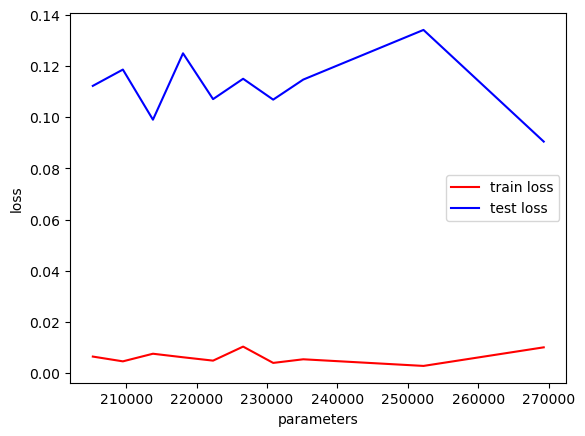

In [58]:
plt.figure()
plt.plot(total_params_list, train_loss_list, color='red', label="train loss")
plt.plot(total_params_list, test_loss_list, color='blue', label="test loss")
plt.legend()
plt.xlabel("parameters")
plt.ylabel("loss")
plt.show()

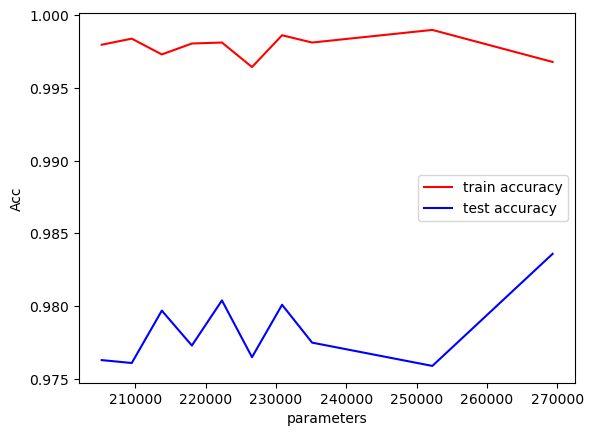

In [68]:

plt.figure()
plt.plot(total_params_list, train_accuracy_list, color='red', label="train accuracy")
plt.plot(total_params_list, test_accuracy_list, color='blue', label="test accuracy")
plt.legend()
plt.xlabel("parameters")
plt.ylabel("Acc")
plt.show()

In [94]:
transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  
])

batch_size = 64

trainset_0= MNIST('data', train = True, download = True, transform = transform)
train_loader_0 = torch.utils.data.DataLoader(trainset_0, batch_size = batch_size, shuffle=True)

testset_0 = MNIST('data', train = False, download = True, transform = transform)
test_loader_0 = torch.utils.data.DataLoader(testset_0 ,batch_size = batch_size, shuffle=True)


In [95]:
batch_size = 1024
trainset_1= MNIST('data', train = True, download = True, transform = transform)
train_loader_1 = torch.utils.data.DataLoader(trainset_1, batch_size = batch_size, shuffle=True)

testset_1 = MNIST('data', train = False, download = True, transform = transform)
test_loader_1 = torch.utils.data.DataLoader(testset_1 ,batch_size = batch_size, shuffle=True)

In [96]:
class Model (nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [97]:
def interpolate_models(interpolated_model, model_A, model_B, alpha):
    # set weights
    for p in interpolated_model.state_dict():
        p_a = model_A.state_dict()[p].cpu().numpy()
        p_b = model_B.state_dict()[p].cpu().numpy()
        interpolated_model.state_dict()[p][:] = torch.Tensor((1-alpha)*p_a + alpha*p_b)
    
    return interpolated_model.to(device)

def train(num_epoches, model, device, train_loader, test_loader, criterion, optimizer):
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    for epoch in range(num_epoches):
        model.train()
        train_loss_per_epoch = 0 
        correct_train = 0
        total_train = 0
        
        test_loss_per_epoch = 0 
        correct_test = 0
        total_test = 0
        
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss_per_epoch += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()
        train_loss_per_epoch /=len(train_loader)
        print(f"Epoch {epoch}, train loss: {train_loss_per_epoch}")
        train_loss.append(train_loss_per_epoch)
        train_accuracy.append(correct_train/total_train)
        print(f"Epoch {epoch}, train accuracy: {correct_train/total_train}")
        
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_loader):
                data, target = data.to(device),target.to(device)
                output = model(data)
                loss = criterion(output, target)
                test_loss_per_epoch += loss.item()
                _, predicted = torch.max(output.data, 1)
                correct_test += predicted.eq(target).sum().item()
                total_test += target.size(0)
        test_loss_per_epoch /= len(test_loader)
        test_loss.append(test_loss_per_epoch)
        test_accuracy.append(correct_test/total_test)
        
        print(f"Epoch {epoch}, test loss: {test_loss_per_epoch}")
        print(f"Epoch {epoch}, test accuracy: {correct_test/total_test}")
            
    
    return  


In [98]:
model_batch_0 =Model().to(device)
model_batch_1 =Model().to(device)

model_lr_0 = Model().to(device)

model_lr_1 = Model().to(device)

criterion = nn.CrossEntropyLoss()


num_epochs = 30
# batchsize
train(num_epoches=num_epochs,model=model_batch_0,device=device, train_loader=train_loader_0,test_loader=test_loader_0, criterion=criterion,optimizer=torch.optim.Adam(model_batch_0.parameters(), lr=1e-3))
train(num_epoches=num_epochs,model=model_batch_1,device=device,train_loader=train_loader_1,test_loader=test_loader_1, criterion=criterion,optimizer=torch.optim.Adam(model_batch_1.parameters(), lr=1e-3))

# lr
train(num_epoches=num_epochs,model=model_lr_0,device=device,train_loader=train_loader_0,test_loader=test_loader_0, criterion=criterion,optimizer=torch.optim.Adam(model_lr_0.parameters(), lr=1e-3))
train(num_epoches=num_epochs,model=model_lr_1,device=device,train_loader=train_loader_0,test_loader=test_loader_0, criterion=criterion,optimizer=torch.optim.Adam(model_lr_1.parameters(), lr=1e-2))


Epoch 0, train loss: 0.44089752558007167
Epoch 0, train accuracy: 0.8706333333333334
Epoch 0, test loss: 0.2462713297480231
Epoch 0, test accuracy: 0.9234
Epoch 1, train loss: 0.20860773513216707
Epoch 1, train accuracy: 0.9373666666666667
Epoch 1, test loss: 0.16911659137031454
Epoch 1, test accuracy: 0.9494
Epoch 2, train loss: 0.1488288165683717
Epoch 2, train accuracy: 0.9555833333333333
Epoch 2, test loss: 0.1308131820409541
Epoch 2, test accuracy: 0.9585
Epoch 3, train loss: 0.11970115008094767
Epoch 3, train accuracy: 0.9634833333333334
Epoch 3, test loss: 0.11763344890776144
Epoch 3, test accuracy: 0.9638
Epoch 4, train loss: 0.10127243533162579
Epoch 4, train accuracy: 0.9689333333333333
Epoch 4, test loss: 0.11051592293675917
Epoch 4, test accuracy: 0.9651
Epoch 5, train loss: 0.09049419419510342
Epoch 5, train accuracy: 0.9712666666666666
Epoch 5, test loss: 0.10457618323979294
Epoch 5, test accuracy: 0.967
Epoch 6, train loss: 0.07793202551567295
Epoch 6, train accuracy: 0.

In [99]:
def evaluate(model, dataloaders, criterion, device):
    model.eval()
    final_loss = 0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(dataloaders):
        
        with torch.no_grad():
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            final_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    final_loss /= len(dataloaders)
    print('final loss: {:.4f}'.format(final_loss))
    print("Accuracy: {:.4f}".format(correct / total))
    return final_loss, correct/total
            
        

In [100]:
alpha_list = np.linspace(-1, 2,100)
interpolated_model = Model().to(device)

train_loss_list_batch = []
train_acc_list_batch = []

test_loss_list_batch = []
test_acc_list_batch = []

train_loss_list_lr = []
train_acc_list_lr = []

test_loss_list_lr = []
test_acc_list_lr = []


for alpha in alpha_list:
    batch_interpolated_model = interpolate_models(interpolated_model, model_batch_0, model_batch_1, alpha)
    lr_interpolated_model = interpolate_models(interpolated_model, model_lr_0, model_lr_1, alpha)
    
    train_loss_batch, train_acc_batch = evaluate(batch_interpolated_model, train_loader_0, criterion, device)
    train_loss_list_batch.append(train_loss_batch)
    train_acc_list_batch.append(train_acc_batch)
    
    test_loss_batch, test_acc_batch = evaluate(batch_interpolated_model, test_loader_0, criterion, device)
    test_loss_list_batch.append(test_loss_batch)
    test_acc_list_batch.append(test_acc_batch)
    
    train_loss_lr, train_acc_lr = evaluate(lr_interpolated_model, train_loader_0, criterion, device)
    train_loss_list_lr.append(train_loss_lr)
    train_acc_list_lr.append(train_acc_lr)
    
    test_loss_lr, test_acc_lr = evaluate(lr_interpolated_model, test_loader_0, criterion, device)
    test_loss_list_lr.append(test_loss_lr)
    test_acc_list_lr.append(test_acc_lr)

final loss: 2797.1860
Accuracy: 0.1075
final loss: 2804.8003
Accuracy: 0.1066
final loss: 2797.6170
Accuracy: 0.1075
final loss: 2802.3542
Accuracy: 0.1066
final loss: 2565.1999
Accuracy: 0.1090
final loss: 2570.5098
Accuracy: 0.1082
final loss: 2565.4282
Accuracy: 0.1090
final loss: 2572.0981
Accuracy: 0.1082
final loss: 2346.8240
Accuracy: 0.1107
final loss: 2353.7375
Accuracy: 0.1102
final loss: 2346.8661
Accuracy: 0.1107
final loss: 2356.2736
Accuracy: 0.1102
final loss: 2141.0461
Accuracy: 0.1125
final loss: 2147.1200
Accuracy: 0.1123
final loss: 2140.6010
Accuracy: 0.1125
final loss: 2147.7601
Accuracy: 0.1123
final loss: 1946.8141
Accuracy: 0.1145
final loss: 1951.6250
Accuracy: 0.1139
final loss: 1946.8874
Accuracy: 0.1145
final loss: 1952.2738
Accuracy: 0.1139
final loss: 1765.2703
Accuracy: 0.1165
final loss: 1767.1787
Accuracy: 0.1156
final loss: 1765.2750
Accuracy: 0.1165
final loss: 1766.9696
Accuracy: 0.1156
final loss: 1595.0594
Accuracy: 0.1186
final loss: 1596.4434
Acc

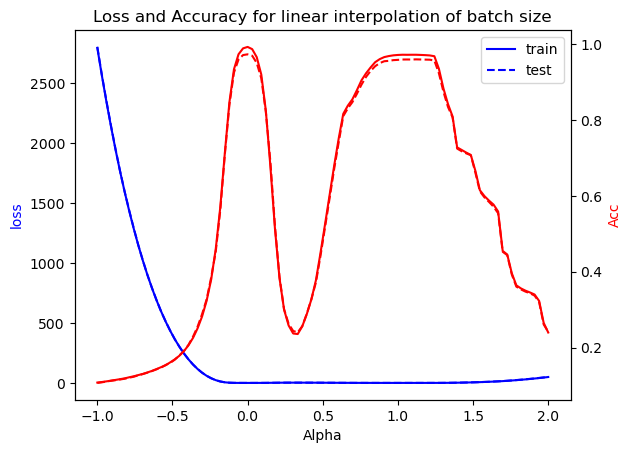

In [109]:

fig, ax1 = plt.subplots()
ax1.set_xlabel('Alpha')
ax1.set_ylabel('loss', color='blue')
ax1.plot(alpha_list, train_loss_list_batch, color='blue', label="train")
ax1.plot(alpha_list, test_loss_list_batch, '--', color='blue', label="test")
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Acc', color='red')
ax2.plot(alpha_list, train_acc_list_batch, color='red')
ax2.plot(alpha_list, test_acc_list_batch, '--', color='red')
plt.title("Loss and Accuracy for linear interpolation of batch size")
plt.show()

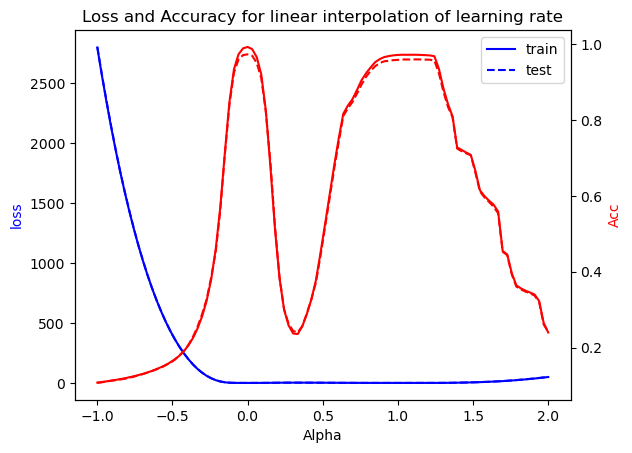

In [102]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Alpha')
ax1.set_ylabel('loss', color='blue')
ax1.plot(alpha_list, train_loss_list_lr, color='blue', label="train")
ax1.plot(alpha_list, test_loss_list_lr, '--', color='blue', label="test")
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Acc', color='red')
ax2.plot(alpha_list, train_acc_list_lr, color='red')
ax2.plot(alpha_list, test_acc_list_lr, '--', color='red')
plt.title("Loss and Accuracy for linear interpolation of learning rate")
plt.show()

In [103]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [104]:

transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  
])
num_epochs =30
batchsize_list = [1024, 512, 256, 128, 64]

trainset= MNIST('data', train = True, download = True, transform = transform)
train_loader_list = [torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True) for batch_size in batchsize_list]

testset= MNIST('data', train = False, download = True, transform = transform)
test_loader_list = [torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=True) for batch_size in batchsize_list]

In [105]:
training_loss_data=[]
test_loss_data=[]
training_accuracy_data=[]
test_accuracy_data=[]
sensitivity_data=[]
for i in range(len(train_loader_list)):
    
    train_loader = train_loader_list[i]
    # train_loader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle=True)
    test_loader = test_loader_list[i]
    train_accuracies=[]
    test_accuracies=[]
    train_losses=[]
    test_losses=[]
    sensitivities=[]

    model = Model().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    

    for epoch in range(num_epochs):
        

        epoch_sensitivity = 0.0
        
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # backward and optimize
            optimizer.zero_grad()
        

            grads_p = torch.autograd.grad(loss, model.parameters(), create_graph=True)[0]
            epoch_sensitivity += grads_p.norm(2).detach().cpu().item() / len(train_loader)

            loss.backward()
            optimizer.step()
           
        # evaluate loss on test set
        training_loss,train_accuracy  = evaluate(model=model, dataloaders=train_loader, criterion=criterion, device=device)
        test_loss,  test_accuracy= evaluate(model=model, dataloaders=test_loader, criterion=criterion, device=device)
        

        # store epoch stats
        train_losses.append(training_loss)
        train_accuracies.append(train_accuracy)
        sensitivities.append(epoch_sensitivity)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
    
    # store mean values for current model
    test_loss_data.append(np.mean(test_losses))
    test_accuracy_data.append(np.mean(test_accuracies))
    training_loss_data.append(np.mean(train_losses))
    training_accuracy_data.append(np.mean(train_accuracies))
    sensitivity_data.append(np.mean(sensitivities))
    
    

final loss: 0.4711
Accuracy: 0.8644
final loss: 0.4505
Accuracy: 0.8699
final loss: 0.3415
Accuracy: 0.8990
final loss: 0.3299
Accuracy: 0.9029
final loss: 0.2977
Accuracy: 0.9123
final loss: 0.2928
Accuracy: 0.9165
final loss: 0.2795
Accuracy: 0.9175
final loss: 0.2781
Accuracy: 0.9186
final loss: 0.2476
Accuracy: 0.9287
final loss: 0.2485
Accuracy: 0.9285
final loss: 0.2268
Accuracy: 0.9352
final loss: 0.2311
Accuracy: 0.9333
final loss: 0.2087
Accuracy: 0.9390
final loss: 0.2139
Accuracy: 0.9363
final loss: 0.1898
Accuracy: 0.9456
final loss: 0.1955
Accuracy: 0.9440
final loss: 0.1720
Accuracy: 0.9506
final loss: 0.1813
Accuracy: 0.9471
final loss: 0.1579
Accuracy: 0.9540
final loss: 0.1670
Accuracy: 0.9495
final loss: 0.1367
Accuracy: 0.9603
final loss: 0.1482
Accuracy: 0.9564
final loss: 0.1266
Accuracy: 0.9637
final loss: 0.1388
Accuracy: 0.9579
final loss: 0.1170
Accuracy: 0.9663
final loss: 0.1321
Accuracy: 0.9600
final loss: 0.1150
Accuracy: 0.9673
final loss: 0.1307
Accuracy:

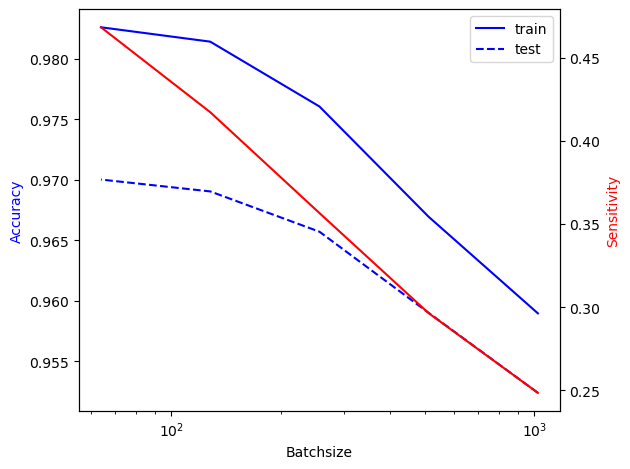

In [106]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Batchsize')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy', color='blue')
ax1.plot(batchsize_list, training_accuracy_data, color='blue', label="train")
ax1.plot(batchsize_list, test_accuracy_data, '--', color='blue', label="test")
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Sensitivity', color='red')
ax2.plot(batchsize_list, sensitivity_data, color='red', label="sensitivity")
fig.tight_layout()
plt.show()

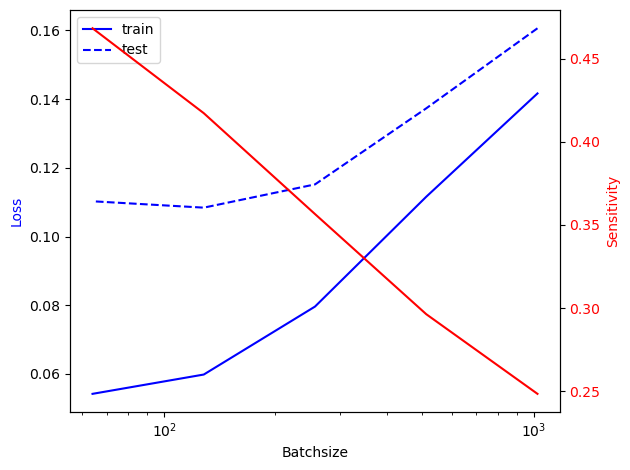

In [107]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Batchsize')
ax1.set_xscale('log')
ax1.set_ylabel('Loss', color='blue')
ax1.plot(batchsize_list, training_loss_data, color='blue', label="train")
ax1.plot(batchsize_list, test_loss_data, '--', color='blue', label="test")
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Sensitivity', color='red')
ax2.plot(batchsize_list,sensitivity_data,color='red',label="sensitivity")
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()
plt.show()